In [1]:
import scanpy as sc
import scanpy.external as sce
import pandas as pd
import numpy as np
import os
import triku as tk
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm.notebook import tqdm
import ray
import subprocess
from scipy.sparse import csr_matrix
from IPython.display import display, HTML

from tqdm.notebook import tqdm

from bokeh.io import show, output_notebook, reset_output

from scipy.sparse import csr_matrix, csc_matrix

reset_output()
output_notebook()

Loading BokehJS ...

In [2]:
magma = [plt.get_cmap('magma')(i) for i in np.linspace(0,1, 80)]
magma[0] = (0.88, 0.88, 0.88, 1)
magma = mpl.colors.LinearSegmentedColormap.from_list("", magma[:65])

seed = 0

In [3]:
mpl.rcParams['figure.dpi'] = 250

# Loading full datasets

In [4]:
adata_oprescu_d0 = sc.read('data/processed/oprescu_d0.h5')

In [5]:
adata_scott_d0 = sc.read('data/processed/scott_d0.h5')

In [6]:
adata_de_micheli_mouse_d0 = sc.read('data/processed/de_micheli_mouse_d0.h5')

In [7]:
adata_giordani = sc.read('data/processed/giordani.h5')

In [8]:
adata_proietti = sc.read('data/processed/proietti.h5')

In [9]:
adata_ronzoni = sc.read('data/processed/ronzoni.h5')

In [10]:
adata_dellorso = sc.read('data/processed/dellorso.h5')

In [11]:
# Move the UMAPs
w = -1.4

list_new_coords = []
for adata in [adata_oprescu_d0, adata_scott_d0, adata_de_micheli_mouse_d0,
              adata_giordani, adata_proietti, adata_ronzoni, adata_dellorso]:
    X_coords = (adata.obsm['X_umap'][:, 0] - adata.obsm['X_umap'][:, 0].min()) / (adata.obsm['X_umap'][:, 0].max() - adata.obsm['X_umap'][:, 0].min())
    Y_coords = (adata.obsm['X_umap'][:, 1] - adata.obsm['X_umap'][:, 1].min()) / (adata.obsm['X_umap'][:, 1].max() - adata.obsm['X_umap'][:, 1].min())
    list_new_coords.append(np.array([X_coords, Y_coords]).transpose())
    
adata_oprescu_d0.obsm['X_umap'] = (list_new_coords[0] + np.array([[0, 0]])).astype(np.float32)
adata_scott_d0.obsm['X_umap'] = (list_new_coords[1] + np.array([[0, w]])).astype(np.float32)
adata_de_micheli_mouse_d0.obsm['X_umap'] = (list_new_coords[2] + np.array([[0, 2*w]])).astype(np.float32)
adata_giordani.obsm['X_umap'] = (list_new_coords[3] + np.array([[-w, 0]])).astype(np.float32)
adata_proietti.obsm['X_umap'] = (list_new_coords[4] + np.array([[-w, w]])).astype(np.float32)
adata_ronzoni.obsm['X_umap'] = (list_new_coords[5] + np.array([[-w, 2 * w]])).astype(np.float32)
adata_dellorso.obsm['X_umap'] = (list_new_coords[6] + np.array([[-2*w, 0]])).astype(np.float32)


In [12]:
adata_joined = sc.AnnData.concatenate(adata_oprescu_d0, adata_scott_d0, adata_de_micheli_mouse_d0,
              adata_giordani, adata_proietti, adata_ronzoni, adata_dellorso, join='outer')

In [13]:
adata_joined.obs = adata_joined.obs[['cell_type', 'dataset', 'krano_type', 'condition']]
del adata_joined.var
del adata_joined.layers
del adata_joined.obsm['X_pca']
adata_joined.uns['krano_type_colors'] = ['#bcbcbc', '#900C3F', '#286e87']
adata_joined.uns['condition_colors'] = ['#900C3F', '#286e87', '#bcbcbc', ]

In [14]:
adata_joined

AnnData object with n_obs × n_vars = 36278 × 36414
    obs: 'cell_type', 'dataset', 'krano_type', 'condition'
    uns: 'krano_type_colors', 'condition_colors'
    obsm: 'X_umap'

In [15]:
adata_joined.X = csc_matrix(adata_joined.X)

In [16]:
sc.pp.filter_genes(adata_joined, min_counts=10)
adata_joined

AnnData object with n_obs × n_vars = 36278 × 24717
    obs: 'cell_type', 'dataset', 'krano_type', 'condition'
    var: 'n_counts'
    uns: 'krano_type_colors', 'condition_colors'
    obsm: 'X_umap'

... storing 'cell_type' as categorical
... storing 'dataset' as categorical
... storing 'krano_type' as categorical
... storing 'condition' as categorical


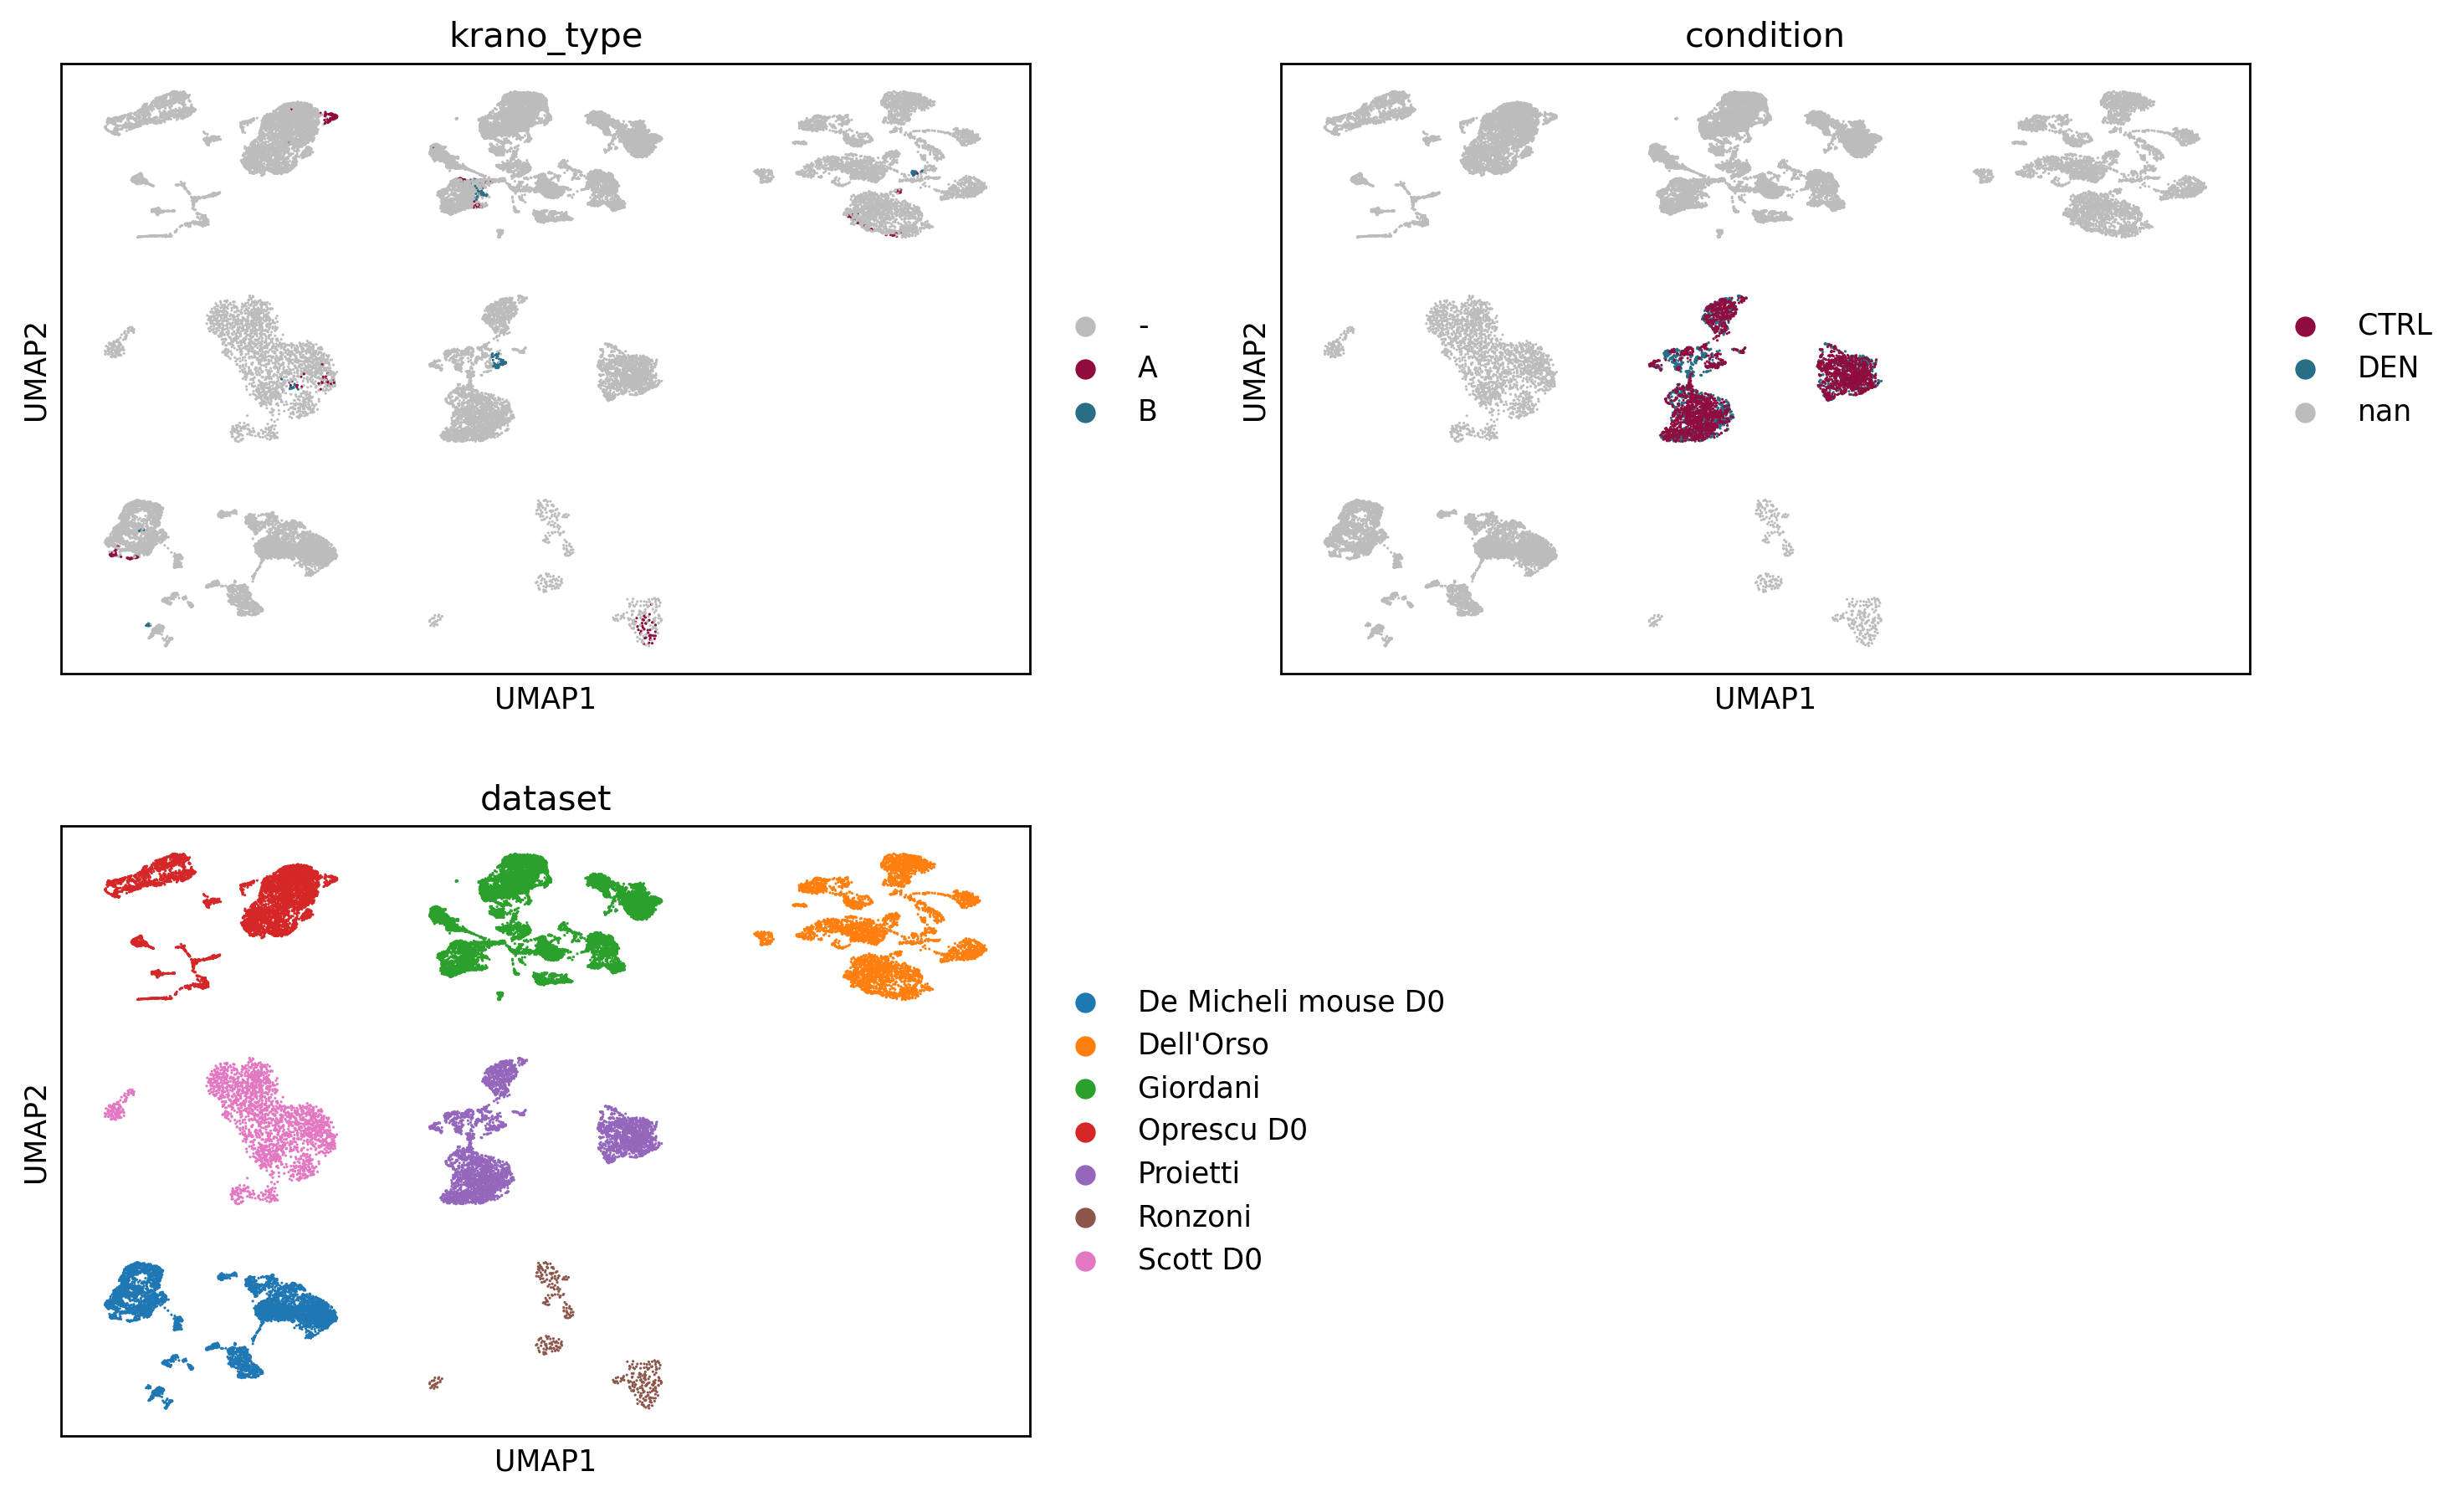

In [17]:
sc.pl.umap(adata_joined, color=['krano_type', 'condition', 'dataset',], ncols=2)

In [18]:
adata_joined.write_h5ad('data/processed/joined.h5ad')

# Loading sub datasets

In [19]:
adata_oprescu_d0_sub = sc.read('data/processed/oprescu_d0_sub.h5')

In [20]:
adata_scott_d0_sub = sc.read('data/processed/scott_d0_sub.h5')

In [21]:
adata_de_micheli_mouse_d0_sub = sc.read('data/processed/de_micheli_mouse_d0_sub.h5')

In [22]:
adata_giordani_sub = sc.read('data/processed/giordani_sub.h5')

In [23]:
adata_proietti_sub = sc.read('data/processed/proietti_sub.h5')

In [24]:
adata_ronzoni_sub = sc.read('data/processed/ronzoni_sub.h5')

In [25]:
adata_dellorso_sub = sc.read('data/processed/dellorso_sub.h5')

In [26]:
# Move the UMAPs
w = -1.4

list_new_coords = []
for adata in [adata_oprescu_d0_sub, adata_scott_d0_sub, adata_de_micheli_mouse_d0_sub,
              adata_giordani_sub, adata_proietti_sub, adata_ronzoni_sub, adata_dellorso_sub]:
    X_coords = (adata.obsm['X_umap'][:, 0] - adata.obsm['X_umap'][:, 0].min()) / (adata.obsm['X_umap'][:, 0].max() - adata.obsm['X_umap'][:, 0].min())
    Y_coords = (adata.obsm['X_umap'][:, 1] - adata.obsm['X_umap'][:, 1].min()) / (adata.obsm['X_umap'][:, 1].max() - adata.obsm['X_umap'][:, 1].min())
    list_new_coords.append(np.array([X_coords, Y_coords]).transpose())
    
adata_oprescu_d0_sub.obsm['X_umap'] = (list_new_coords[0] + np.array([[0, 0]])).astype(np.float32)
adata_scott_d0_sub.obsm['X_umap'] = (list_new_coords[1] + np.array([[0, w]])).astype(np.float32)
adata_de_micheli_mouse_d0_sub.obsm['X_umap'] = (list_new_coords[2] + np.array([[0, 2*w]])).astype(np.float32)
adata_giordani_sub.obsm['X_umap'] = (list_new_coords[3] + np.array([[-w, 0]])).astype(np.float32)
adata_proietti_sub.obsm['X_umap'] = (list_new_coords[4] + np.array([[-w, w]])).astype(np.float32)
adata_ronzoni_sub.obsm['X_umap'] = (list_new_coords[5] + np.array([[-w, 2 * w]])).astype(np.float32)
adata_dellorso_sub.obsm['X_umap'] = (list_new_coords[6] + np.array([[-2*w, 0]])).astype(np.float32)


In [27]:
adata_joined_sub = sc.AnnData.concatenate(adata_oprescu_d0_sub, adata_scott_d0_sub, adata_de_micheli_mouse_d0_sub,
              adata_giordani_sub, adata_proietti_sub, adata_ronzoni_sub, adata_dellorso_sub, join='outer')

In [28]:
adata_joined_sub.obs = adata_joined_sub.obs[['cell_type', 'dataset', 'krano_type', 'condition']]
del adata_joined_sub.var
del adata_joined_sub.layers
del adata_joined_sub.obsm['X_pca']
adata_joined_sub.uns['krano_type_colors'] = ['#bcbcbc', '#900C3F', '#286e87']
adata_joined_sub.uns['condition_colors'] = ['#900C3F', '#286e87', '#bcbcbc', ]

... storing 'cell_type' as categorical
... storing 'dataset' as categorical
... storing 'krano_type' as categorical
... storing 'condition' as categorical


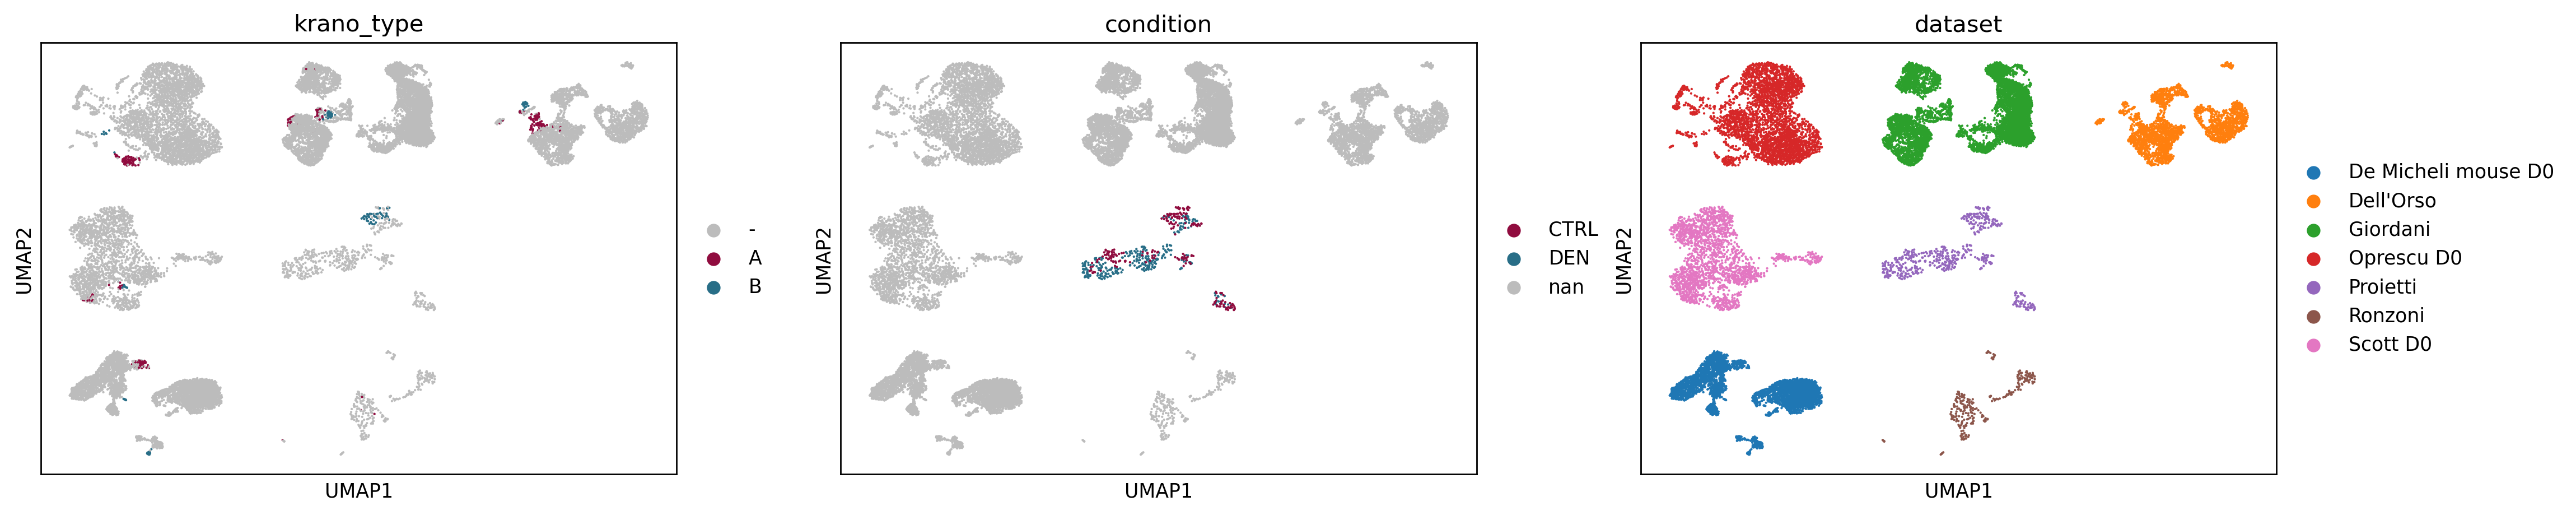

In [29]:
sc.pl.umap(adata_joined_sub, color=['krano_type', 'condition', 'dataset',])

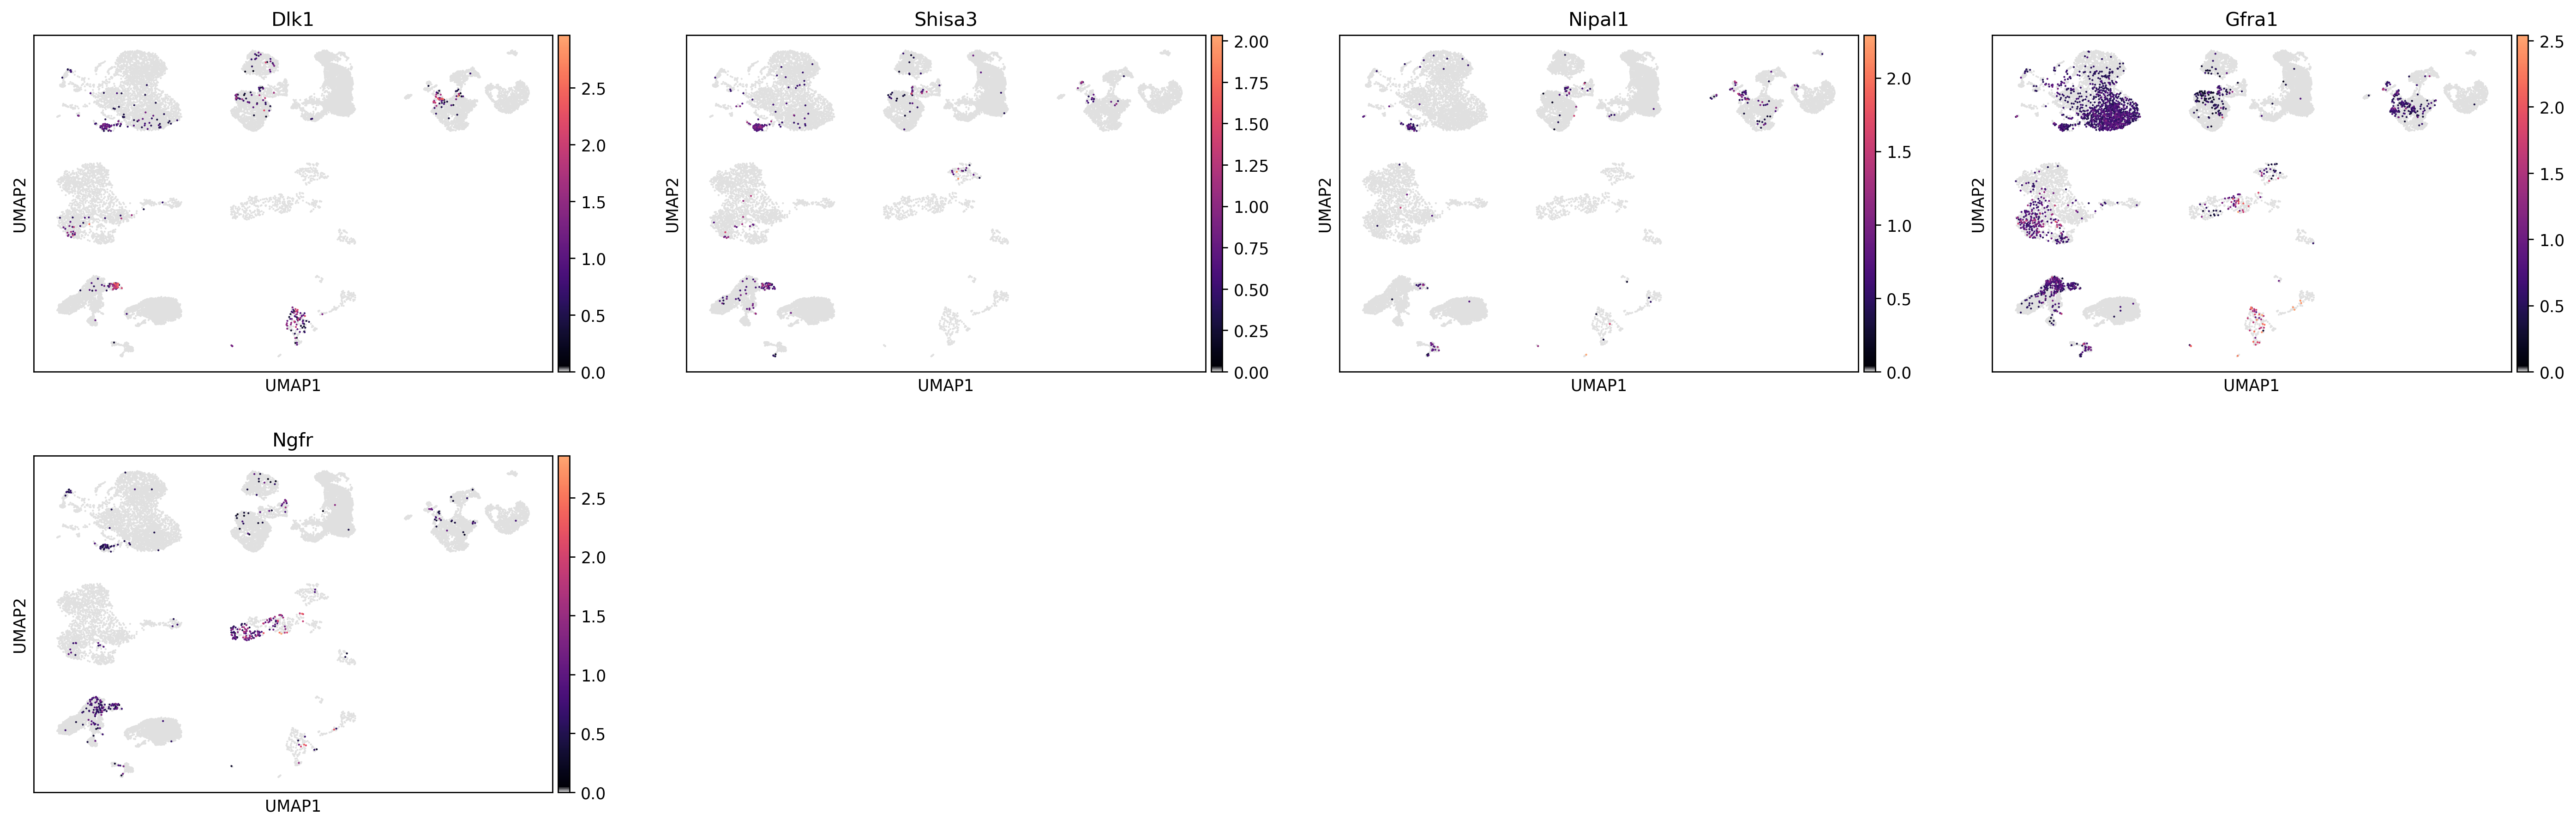

In [30]:
sc.pl.umap(adata_joined_sub, color=['Dlk1', 'Shisa3', 'Nipal1', 'Gfra1', 'Ngfr'], cmap=magma)

In [31]:
adata_joined_sub

AnnData object with n_obs × n_vars = 20255 × 29690
    obs: 'cell_type', 'dataset', 'krano_type', 'condition'
    uns: 'krano_type_colors', 'condition_colors', 'dataset_colors'
    obsm: 'X_umap'

In [32]:
adata_joined_sub.X = csc_matrix(adata_joined_sub.X)

In [33]:
sc.pp.filter_genes(adata_joined_sub, min_counts=10)
adata_joined_sub

AnnData object with n_obs × n_vars = 20255 × 20983
    obs: 'cell_type', 'dataset', 'krano_type', 'condition'
    var: 'n_counts'
    uns: 'krano_type_colors', 'condition_colors', 'dataset_colors'
    obsm: 'X_umap'

In [34]:
adata_joined_sub.write_h5ad('data/processed/joined_sub.h5ad')